### <font color='blue'> LEAD SCORING CASE STUDY </font>
* Submitted by Rahul Gupta, Rahul Davaskar, Rinky Juneja
* DSC56

####  <font color='orange'> 1. DATA UNDERSTANDING </font>

##### Import Libraries #####

In [1]:
import numpy as np
import pandas as pd
from typing import Final

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

##### Read the Data #####

In [2]:
data = pd.read_csv('Leads.csv')
data.sample(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2143,8076461b-b575-44c5-9f23-fcefca5794a3,639201,Landing Page Submission,Google,No,No,0,5.0,8,2.5,...,No,NaN,Thane & Outskirts,02.Medium,01.High,13.0,17.0,No,No,Modified
5626,36a5408e-45ed-4546-9541-2762986eb7cf,606821,Landing Page Submission,Google,No,No,0,3.0,264,3.0,...,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,No,SMS Sent
6450,f66810e5-628b-47d2-a3c0-d622d2e2e316,600517,API,Organic Search,No,No,1,3.0,1301,1.5,...,No,Select,Select,NaN,NaN,NaN,NaN,No,No,SMS Sent
1269,2088d188-0c9e-464c-b70c-ba2341864d64,646456,API,Olark Chat,No,No,1,0.0,0,0.0,...,No,Select,Select,01.High,02.Medium,16.0,15.0,No,No,SMS Sent
6028,574a578c-3aa3-42b7-a6d5-e057ba147875,603581,Lead Add Form,Reference,No,No,1,2.0,1548,2.0,...,No,Select,Select,NaN,NaN,NaN,NaN,No,No,Page Visited on Website
367,ef57aab3-089d-4379-9e5a-4ff471c840bb,656527,API,Referral Sites,No,No,0,5.0,809,5.0,...,No,NaN,NaN,02.Medium,02.Medium,14.0,13.0,No,No,Modified
376,b967b0c5-e38d-4d25-9f68-ccea5a003ad1,656478,Landing Page Submission,Google,No,No,0,4.0,372,4.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
7553,c62b2956-cfc2-4ce1-ac8e-49c2e8d0ad10,591689,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,14.0,15.0,No,No,Email Opened
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,...,No,Lateral Student,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
182,c5cac611-2349-4eb3-bf93-924225b8fa88,658618,API,Referral Sites,No,No,0,4.0,904,4.0,...,No,Select,Select,01.High,02.Medium,17.0,13.0,No,No,Modified


* Most Columns have Select as values in them , they could be treated as NaN

##### Data Dimension #####

In [3]:
data.shape

(9240, 37)

##### Info #####

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Describe #####

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Check NaN count #####

In [6]:
def check_nan_count():
    cnc = round(data.isnull().sum()*100/len(data.index),2)
    print(cnc)

In [7]:
check_nan_count()

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### Check for Duplicate Rows #####

In [8]:
data.loc[data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### <font color='orange'> 2. Data Cleansing </font>

##### Drop Columns having more than 35% missing values ####

In [9]:
DROP_COLUMN_THRESHOLD: Final[float] = 35.00 
drop = round(data.isnull().sum()*100/len(data.index),2)>=DROP_COLUMN_THRESHOLD
drop_columns = data.columns[drop]
drop_columns

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [10]:
data = data.drop(drop_columns,axis=1)

In [11]:
check_nan_count()

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
data.City.value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [13]:
## Dropping City Columns as most of the Cities are Select and Mostly Mumbai 
data = data.drop('City',axis=1)

##### Data Imputation #####

In [14]:
## Data Imputation Function
def categorical_column_imputation(df,col):
    mode_value = str(df[col].mode().iloc[0])
    df[col].fillna(mode_value,inplace=True)
    
def numerical_column_imputation(df,col):
    mean_value = int(df[col].mean())
    df[col].fillna(mean_value,inplace=True)

In [15]:
check_nan_count()

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [16]:
data.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [17]:
categorical_column_imputation(data,'Country')

In [18]:
data.Specialization.value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [19]:
data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [20]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [21]:
categorical_column_imputation(data,'What is your current occupation')

In [22]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [23]:
data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [24]:
## Dropping this Column because it has same value in each row
data = data.drop('What matters most to you in choosing a course',axis=1)

In [25]:
data['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [26]:
## Dropping Lead Profile as it has 30% null values and have mostly Select in rest of the data
data = data.drop('Lead Profile',axis=1)

In [27]:
check_nan_count()

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                      0.00
Specialization                              15.56
How did you hear about X Education          23.89
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00


In [28]:
## Replace Select with NaN
data['Specialization'] = data['Specialization'].replace('Select',np.nan)
data['How did you hear about X Education'] = data['How did you hear about X Education'].replace('Select',np.nan)

In [29]:
## Check null value percentage 
check_nan_count()

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                      0.00
Specialization                              36.58
How did you hear about X Education          78.46
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00


In [30]:
## Dropping 'What is your current occupation' column as it has more than 70% unknown data
data = data.drop('How did you hear about X Education',axis=1)

In [31]:
## Drop Specialization columns as it has more than 35% unknown data
data = data.drop('Specialization',axis=1)

In [32]:
check_nan_count()

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [33]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [34]:
categorical_column_imputation(data,'Last Activity')

In [35]:
check_nan_count()

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Country                                     0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [36]:
data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [37]:
numerical_column_imputation(data,'Page Views Per Visit')

In [38]:
data['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [39]:
numerical_column_imputation(data,'TotalVisits')

In [40]:
data['Lead Origin'].value_counts()
categorical_column_imputation(data,'Lead Origin')

In [41]:
data['Lead Source'].value_counts()
categorical_column_imputation(data,'Lead Source')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [43]:
## Drop Prospect ID 
data = data.drop('Prospect ID',axis=1)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9240 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9240 non-null   float64
 9   Last Activity                             9240 non-null   object 
 10  Country                             

In [45]:
## Convert Lead Number to Index
data=data.set_index('Lead Number')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Country                                   9240 non-null   object 
 10  What is your current occupation   

In [47]:
data.sample(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
604406,API,Google,No,No,0,2.0,890,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
613099,Landing Page Submission,Direct Traffic,No,No,0,3.0,458,3.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
619527,API,Olark Chat,No,No,0,0.0,0,0.0,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
646847,Landing Page Submission,Direct Traffic,No,No,0,2.0,24,2.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,Yes,Modified
603490,Landing Page Submission,Google,No,No,1,7.0,1568,7.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,SMS Sent
648481,Landing Page Submission,Direct Traffic,No,No,0,2.0,1502,2.0,Email Opened,Kuwait,...,No,No,No,No,No,No,No,No,Yes,Email Opened
598110,Landing Page Submission,Direct Traffic,No,No,1,5.0,1449,5.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
606470,Landing Page Submission,Direct Traffic,No,No,0,3.0,228,3.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,SMS Sent
619486,API,Google,No,No,1,6.0,1352,2.0,SMS Sent,India,...,No,No,No,No,No,No,No,No,No,SMS Sent


##### Columns Categorization #####

In [48]:
# Filtering out Catergorical and Numerical Columns
categorical_columns=list(data.loc[:, data.dtypes == object].columns)
numerical_columns=list(data.select_dtypes(include=[np.float64,np.int64,np.number]).columns)
numerical_columns.remove('Converted')
targetColumn = ['Converted']
print('Categorical Columns: \n{} \n \n Numerical Columns: \n{}'.format(categorical_columns,numerical_columns))

Categorical Columns: 
['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 Numerical Columns: 
['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [49]:
numerical_columns

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


##### OUTLIERS CHECK #####

TotalVisits
1
Total Time Spent on Website
2
Page Views Per Visit
3


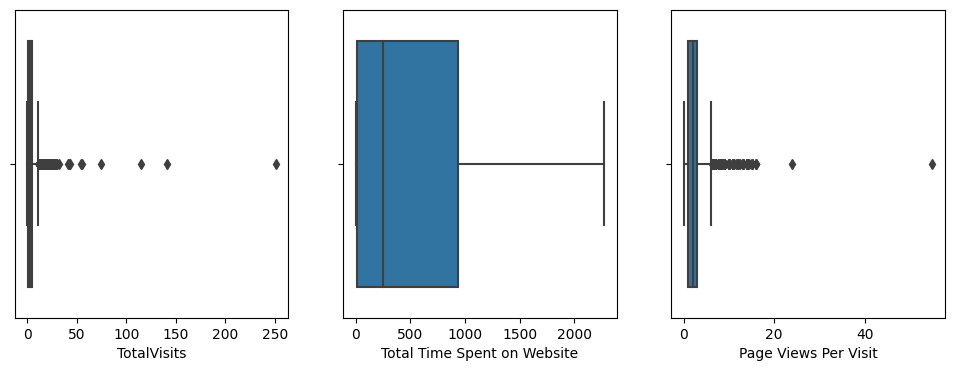

In [50]:
# Finding the outliers
i=1
plt.figure(figsize = (12,4))
for col in numerical_columns:
    print(col)
    print(i)
    plt.subplot(1,3,i)
    sns.boxplot(data=data,x=col)
    plt.xlabel(col)
    i=i+1

* Outliers are presentin TotalVisits and Page Views Per Visit

In [51]:
data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


##### Outliers Treatment #####

In [52]:
def outlier_treatment(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1,Q3,IQR)
    upper_limit = Q3 + (1.5)*IQR
    lower_limit = Q1 - (1.5)*IQR
    return data[(data[col]<upper_limit)&(data[col]>lower_limit)]

In [53]:
## TotalVisits has outlier so they need to be handled
data = outlier_treatment(data,'TotalVisits')

1.0 5.0 4.0


In [54]:
data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8887.000000,8887.000000,8887.000000,8887.000000
mean,0.382131,2.908293,478.330708,2.244591
std,0.485936,2.450644,545.299717,1.908795
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.500000,1.000000
50%,0.000000,3.000000,239.000000,2.000000
75%,1.000000,4.000000,914.000000,3.000000
max,1.000000,10.000000,2272.000000,10.000000


TotalVisits
1
Total Time Spent on Website
2
Page Views Per Visit
3


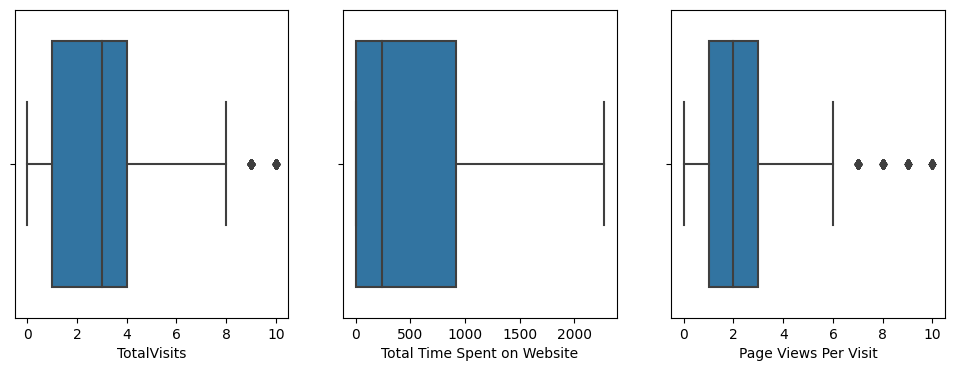

In [55]:
i=1
plt.figure(figsize = (12,4))
for col in numerical_columns:
    print(col)
    print(i)
    plt.subplot(1,3,i)
    sns.boxplot(data=data,x=col)
    plt.xlabel(col)
    i=i+1

* Outliers are handled now

<Figure size 5000x4000 with 0 Axes>

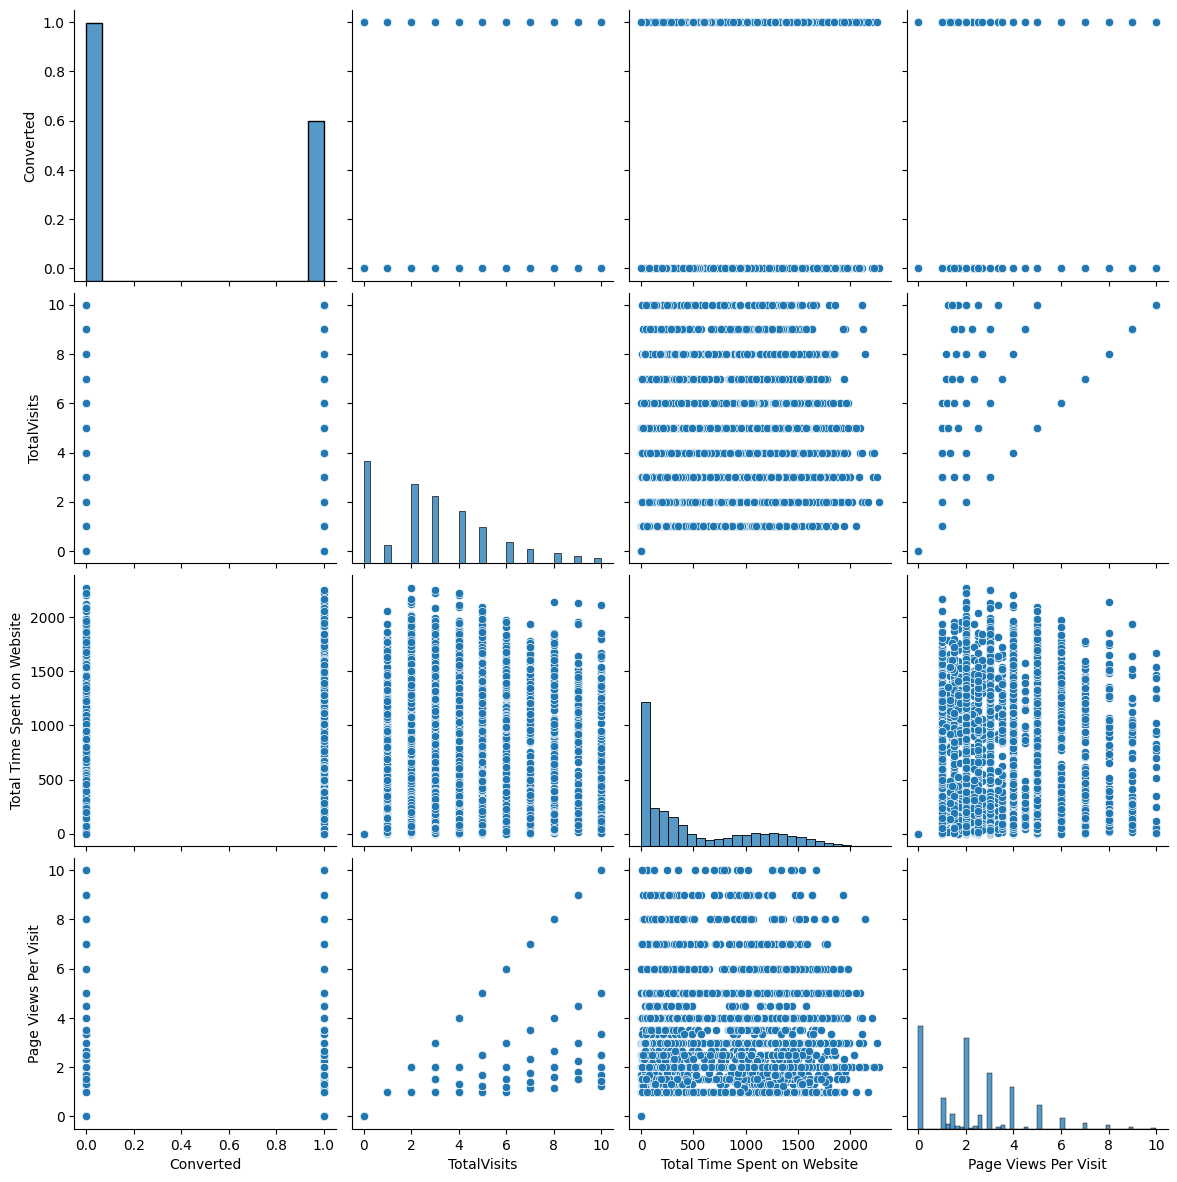

In [56]:
plt.figure(figsize=(50,40))
sns.pairplot(data,size=3)
plt.show()

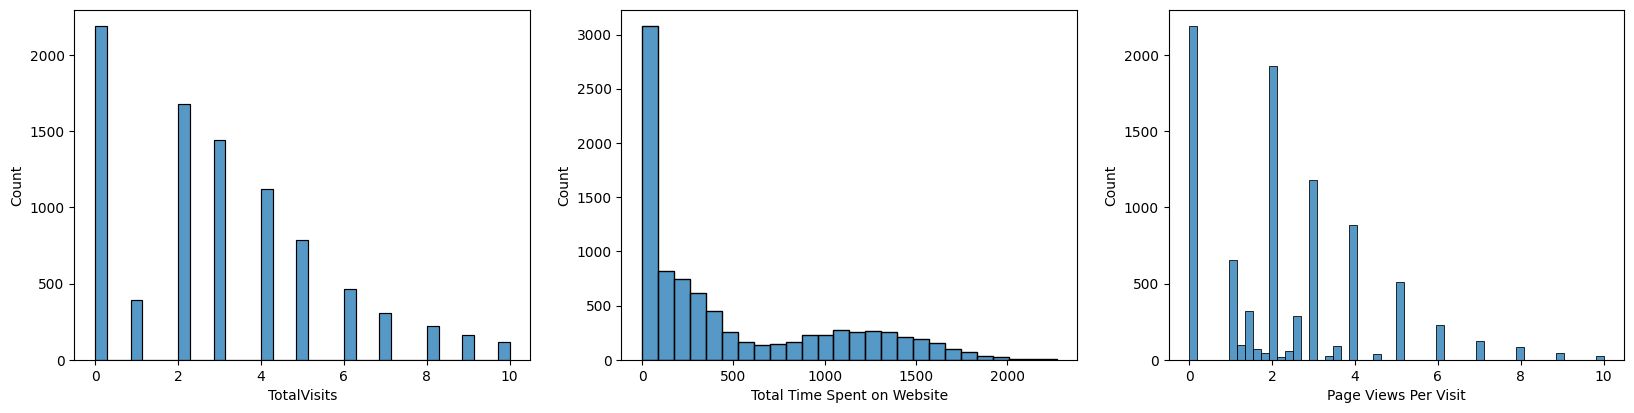

In [57]:
plt.figure(figsize=(20,10))
for i in range(1,len(numerical_columns)+1):
    plt.subplot(2,3,i)
    sns.histplot(x=numerical_columns[i-1],data=data)

* Continous variables are not normally distributed

In [58]:
len(categorical_columns)

20

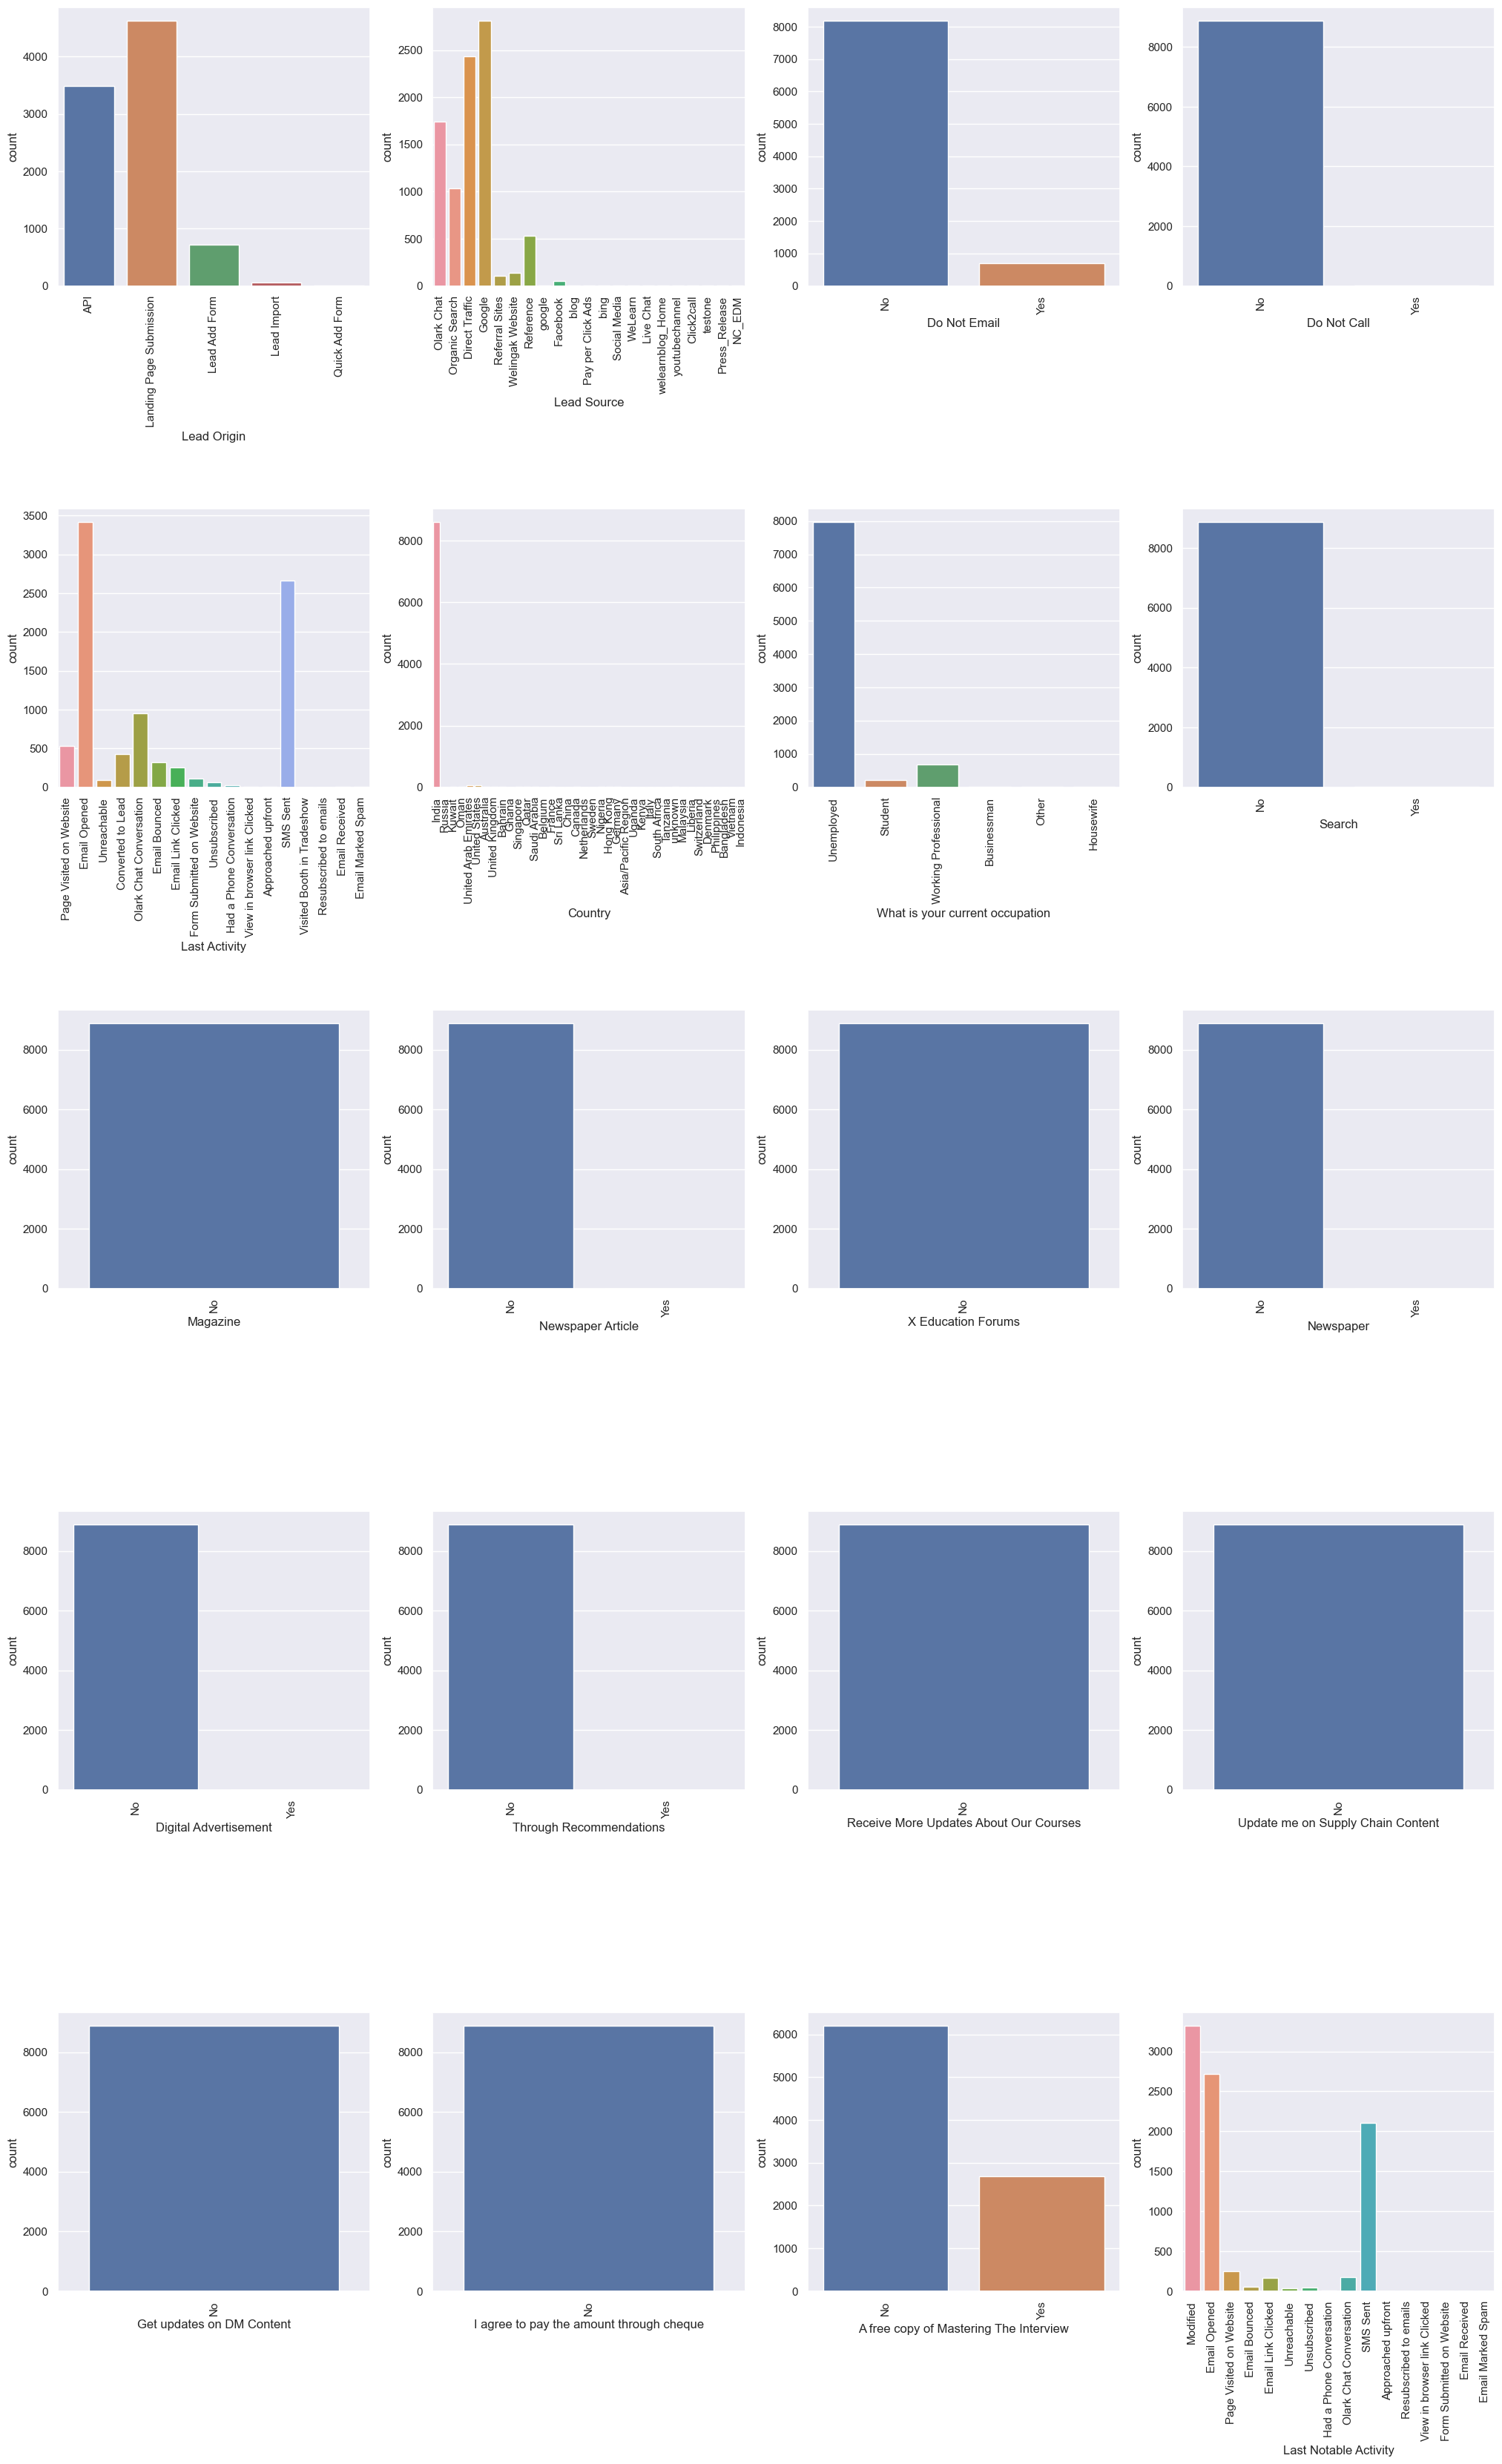

In [59]:
# plotting countplot for object dtype and histogram for number to get data distribution
plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=0.8)
for i in enumerate(categorical_columns):
    plt.subplot(5,4, i[0]+1)
    sns.countplot(data=data,x=i[1])
    plt.xticks(rotation=90)
plt.show()

* Most of the Columns have only single value in it , dropping those unbalanced Columns 
* Most of the Columns have many categories and have less counts for them , need to mark them as Others

In [60]:
data=data.drop(['Do Not Call','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque','Do Not Email'],axis=1)

In [61]:
check_nan_count()

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


In [62]:
data['Lead Source'].value_counts()

Lead Source
Google               2813
Direct Traffic       2432
Olark Chat           1744
Organic Search       1034
Reference             532
Welingak Website      141
Referral Sites        110
Facebook               55
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
youtubechannel          1
Press_Release           1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [63]:
# Lead Score has too many categories, making category as others for which count is less than 1000
ls = data['Lead Source'].value_counts()<1000
cols = list(ls[ls==True].index)
for col in cols:
    data['Lead Source'] = data['Lead Source'].replace(col,'Others')
data['Lead Source'].value_counts()

Lead Source
Google            2813
Direct Traffic    2432
Olark Chat        1744
Organic Search    1034
Others             864
Name: count, dtype: int64

In [64]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3418
SMS Sent                        2664
Olark Chat Conversation          954
Page Visited on Website          535
Converted to Lead                427
Email Bounced                    324
Email Link Clicked               259
Form Submitted on Website        111
Unreachable                       89
Unsubscribed                      60
Had a Phone Conversation          26
Approached upfront                 9
View in browser link Clicked       5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [65]:
# Last Activity has too many categories, making category as others for which count is less than 100
ls = data['Last Activity'].value_counts()<100
cols = list(ls[ls==True].index)
for col in cols:
    data['Last Activity'] = data['Last Activity'].replace(col,'Others')
data['Last Activity'].value_counts()

Last Activity
Email Opened                 3418
SMS Sent                     2664
Olark Chat Conversation       954
Page Visited on Website       535
Converted to Lead             427
Email Bounced                 324
Email Link Clicked            259
Others                        195
Form Submitted on Website     111
Name: count, dtype: int64

In [66]:
data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3319
Email Opened                    2721
SMS Sent                        2106
Page Visited on Website          246
Olark Chat Conversation          175
Email Link Clicked               165
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          11
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [67]:
# Last Notable Activity has too many categories, making category as others for which count is less than 100
ls = data['Last Notable Activity'].value_counts()<100
cols = list(ls[ls==True].index)
for col in cols:
    data['Last Notable Activity'] = data['Last Notable Activity'].replace(col,'Others')
data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3319
Email Opened               2721
SMS Sent                   2106
Page Visited on Website     246
Olark Chat Conversation     175
Email Link Clicked          165
Others                      155
Name: count, dtype: int64

In [68]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              7974
Working Professional     677
Student                  206
Other                     14
Housewife                 10
Businessman                6
Name: count, dtype: int64

In [69]:
# Last Notable Activity has too many categories, making category as others for which count is less than 200
ls = data['What is your current occupation'].value_counts()<200
cols = list(ls[ls==True].index)
for col in cols:
    data['What is your current occupation'] = data['What is your current occupation'].replace(col,'Others')
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              7974
Working Professional     677
Student                  206
Others                    30
Name: count, dtype: int64

In [70]:
data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4629
API                        3488
Lead Add Form               714
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [71]:
# Lead Origin has too many categories, making category as others for which count is less than 100
ls = data['Lead Origin'].value_counts()<100
cols = list(ls[ls==True].index)
for col in cols:
    data['Lead Origin'] = data['Lead Origin'].replace(col,'Others')
data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4629
API                        3488
Lead Add Form               714
Others                       56
Name: count, dtype: int64

In [72]:
check_nan_count()

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


#### <font color='orange'> 3. EDA  </font>

In [73]:
categorical_columns=list(data.loc[:, data.dtypes == object].columns)
categorical_columns

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

##### Univariate Analysis (Categorical)

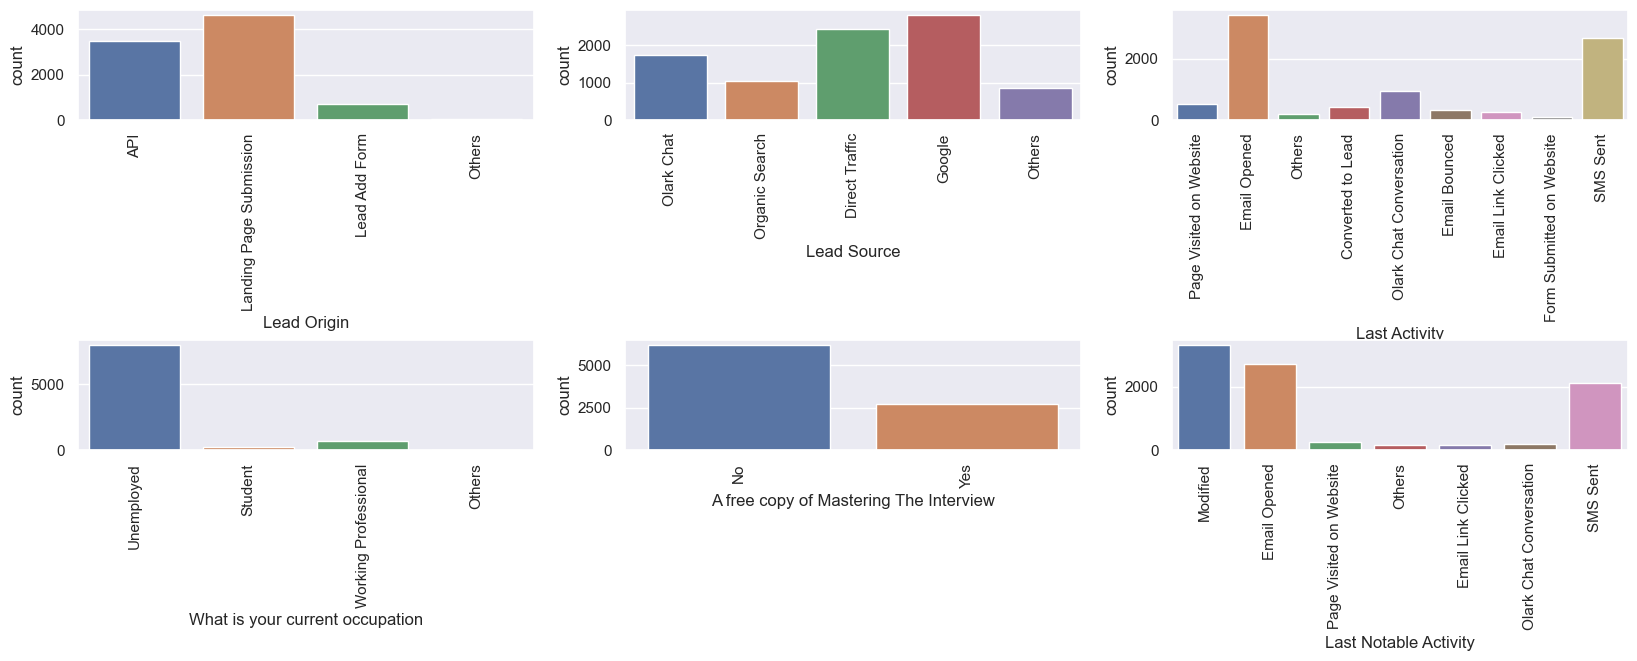

In [74]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=2)
for i in range(1,len(categorical_columns)+1):
    plt.subplot(3,3,i)
    plt.xticks(rotation=90)
    sns.countplot(x=categorical_columns[i-1],data=data)

* Most Leads have arrived from Landing Page Submission
* Google has highest Lead Source
* Mostly Unemployed People lands on the website

##### Univariate Analysis (Continuous)

In [75]:
numerical_columns=list(data.select_dtypes(include=[np.float64,np.int64,np.number]).columns)
numerical_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

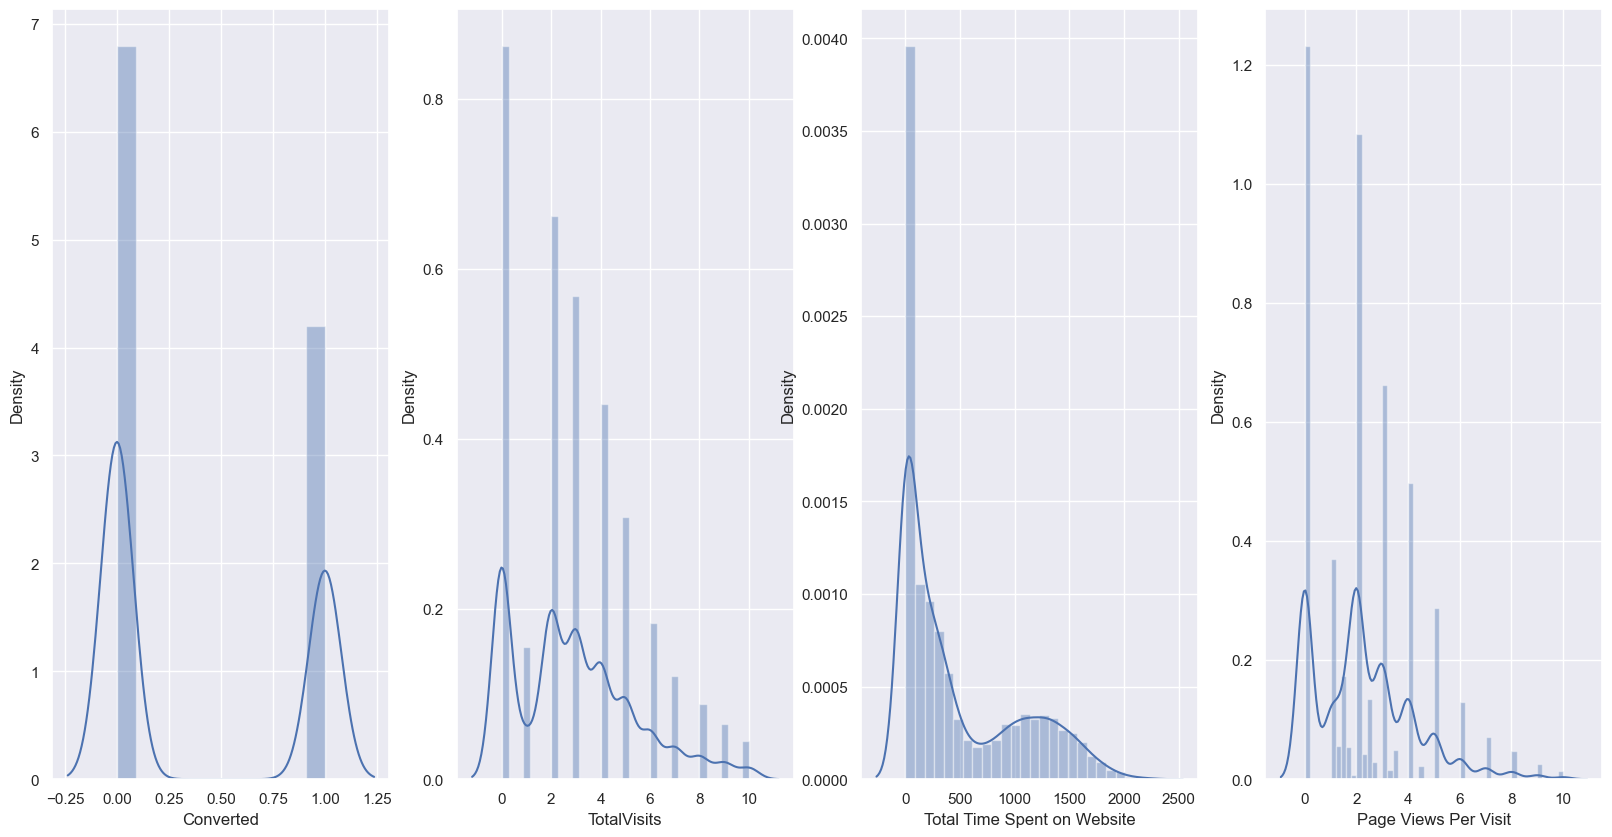

In [76]:
plt.figure(figsize=(20,10))
sns.set()
for i in range(1,len(numerical_columns)+1):
    plt.subplot(1,4,i)
    sns.distplot(data[numerical_columns[i-1]])

* Continous variables are not normally distributed.

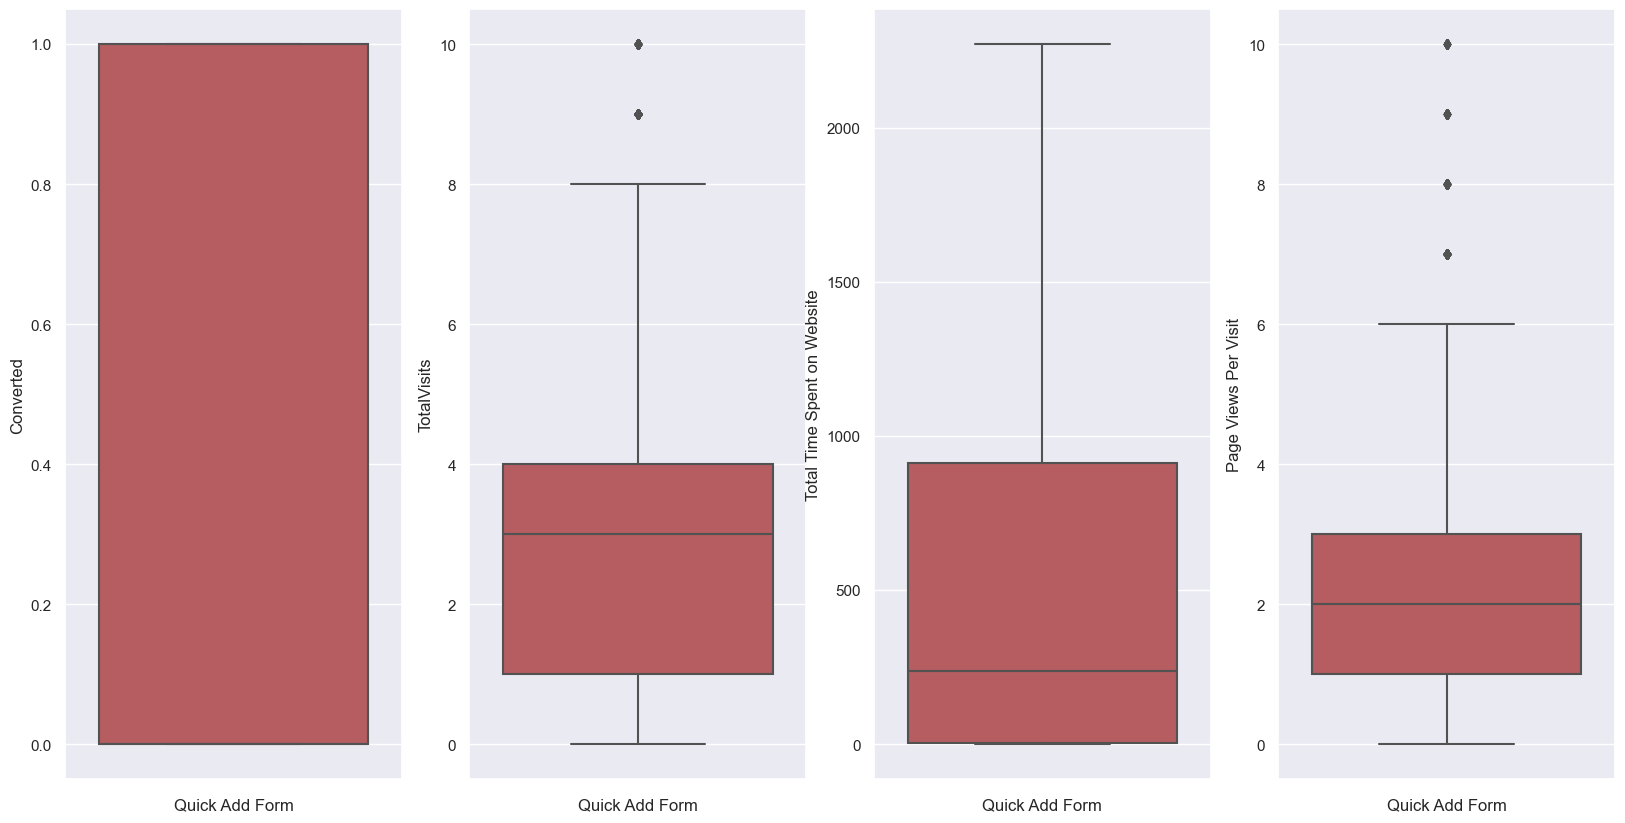

In [77]:
plt.figure(figsize=(20,10))
sns.set()
for i in range(1,len(numerical_columns)+1):
    plt.subplot(1,4,i)
    sns.boxplot(data=data,y=numerical_columns[i-1],color="r",orient="v")
    plt.xlabel(col)

##### Bivariate Analysis (Categorical)

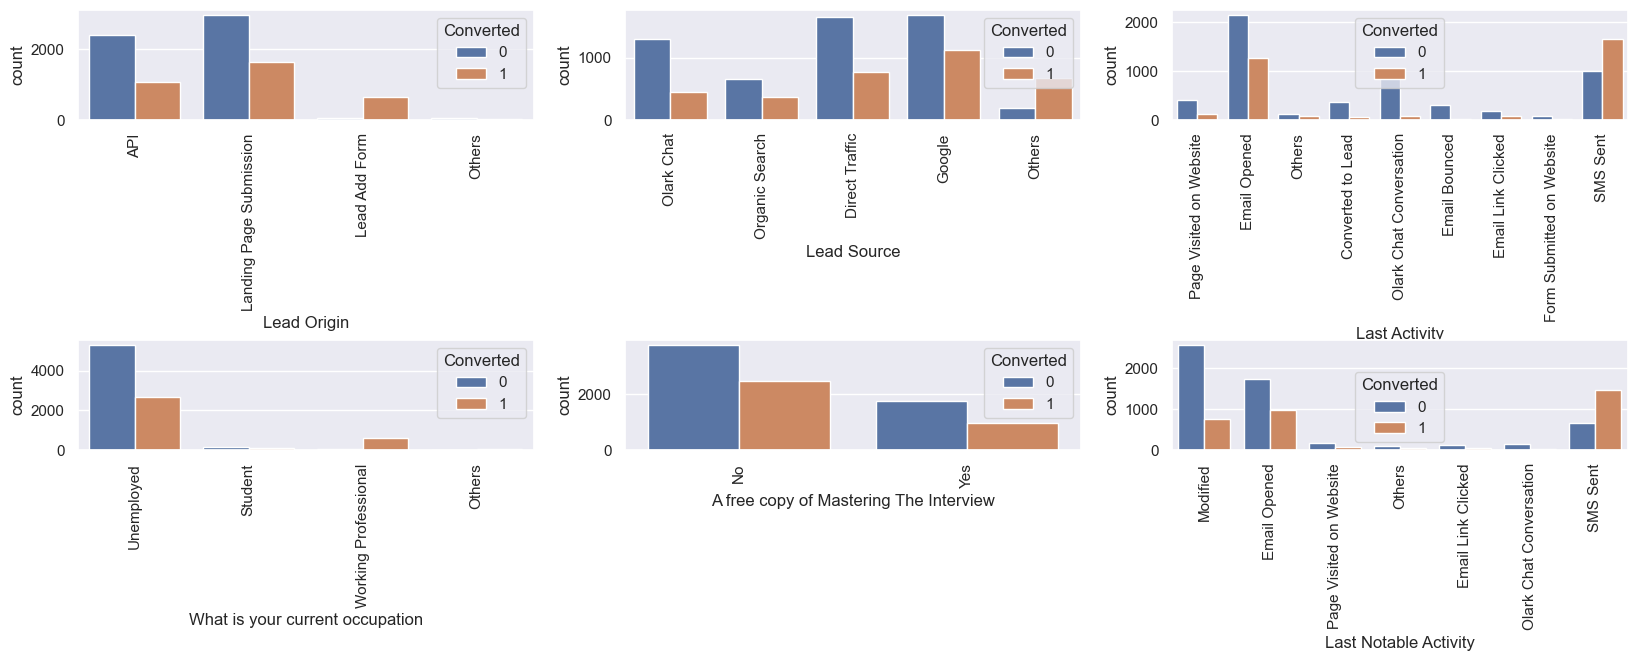

In [78]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=.2,hspace=2)
for i in range(1,len(categorical_columns)+1):
    plt.subplot(3,3,i)
    plt.xticks(rotation=90)
    sns.countplot(x=categorical_columns[i-1],hue="Converted",data=data)

* Most converted are from Lead Origin Add Form 
* Most converted are Working Professional

In [79]:
numerical_columns.remove('Converted')

##### Bivariate Analysis (Continuous)

<Figure size 2500x2000 with 0 Axes>

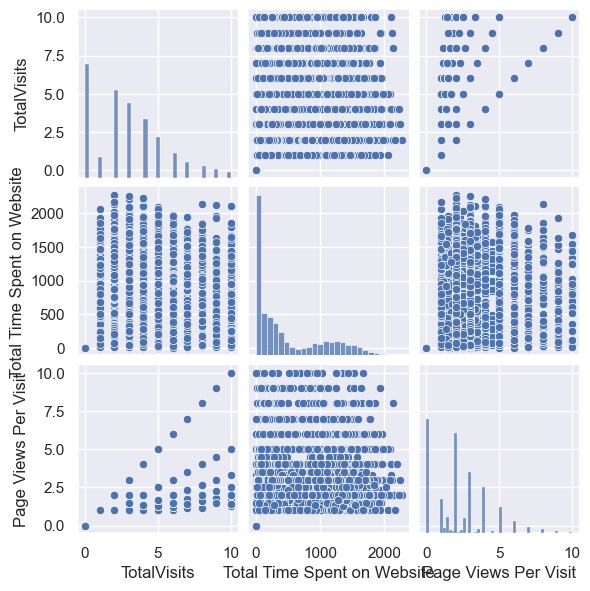

In [80]:
plt.figure(figsize=(25,20))
sns.pairplot(data[numerical_columns],size=2)
plt.show()

#### <font color='orange'> 4. PREPROCESSING STEP </font>

In [81]:
data.sample(10)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
641585,API,Google,0,9.0,195,2.25,Others,Unemployed,No,Others
634511,API,Olark Chat,0,1.0,72,1.00,Email Opened,Unemployed,No,Email Opened
582213,Landing Page Submission,Direct Traffic,0,7.0,359,7.00,SMS Sent,Unemployed,Yes,SMS Sent
631782,Landing Page Submission,Direct Traffic,0,1.0,62,1.00,Converted to Lead,Unemployed,Yes,Modified
591832,API,Olark Chat,0,0.0,0,0.00,Email Opened,Unemployed,No,Email Opened
587777,Landing Page Submission,Direct Traffic,0,7.0,961,1.75,SMS Sent,Unemployed,No,SMS Sent
642719,Landing Page Submission,Organic Search,0,4.0,436,4.00,Email Opened,Unemployed,Yes,Email Opened
655541,Lead Add Form,Others,1,0.0,0,0.00,SMS Sent,Unemployed,No,Modified
585497,API,Direct Traffic,0,5.0,547,2.50,Olark Chat Conversation,Unemployed,No,Modified


In [82]:
data['A free copy of Mastering The Interview'] = data['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [83]:
data.sample(10)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
592405,Landing Page Submission,Direct Traffic,1,3.0,1513,3.0,SMS Sent,Unemployed,1,SMS Sent
596901,API,Olark Chat,0,0.0,0,0.0,Email Opened,Unemployed,0,Email Opened
597640,Landing Page Submission,Direct Traffic,1,6.0,1477,6.0,Email Opened,Unemployed,1,Email Opened
659631,Lead Add Form,Others,1,3.0,1007,2.0,Email Opened,Unemployed,0,Modified
606878,Landing Page Submission,Direct Traffic,0,4.0,173,2.0,Email Opened,Unemployed,1,Email Opened
655541,Lead Add Form,Others,1,0.0,0,0.0,SMS Sent,Unemployed,0,Modified
601804,API,Olark Chat,0,0.0,0,0.0,Email Opened,Student,0,Email Opened
610126,Landing Page Submission,Direct Traffic,1,4.0,63,2.0,SMS Sent,Unemployed,1,SMS Sent
601634,API,Olark Chat,0,0.0,0,0.0,Email Link Clicked,Student,0,Modified


##### Create Dummy Variables

In [84]:
#creating dummies 
dummy_lo = pd.get_dummies(data['Lead Origin'])
dummy_lo.head()
#above step is returning True and False instead of 0 and 1
dummy_lo = dummy_lo.apply(lambda x:x.map({True:1,False:0}))
#add dummies to original data
data = pd.concat([data,dummy_lo],axis=1)
#remove Lead Origin and drop Others
data = data.drop(['Others','Lead Origin'],axis=1)
data.head()

,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,API,Landing Page Submission,Lead Add Form
Lead Number,,,,,,,,,,,,
660737,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,1,0,0
660728,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,1,0,0
660727,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,0,1,0
660719,Direct Traffic,0,1.0,305,1.0,Others,Unemployed,0,Modified,0,1,0
660681,Google,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,0,1,0


In [85]:
#creating dummies 
dummy_ls = pd.get_dummies(data['Lead Source'])
dummy_ls.head()
#above step is returning True and False instead of 0 and 1
dummy_ls = dummy_ls.apply(lambda x:x.map({True:1,False:0}))
#add dummies to original data
data = pd.concat([data,dummy_ls],axis=1)
#remove Lead Source and drop Others
data = data.drop(['Others','Lead Source'],axis=1)
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search
Lead Number,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified,1,0,0,0,0,1,0
660728,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened,1,0,0,0,0,0,1
660727,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened,0,1,0,1,0,0,0
660719,0,1.0,305,1.0,Others,Unemployed,0,Modified,0,1,0,1,0,0,0
660681,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified,0,1,0,0,1,0,0


In [86]:
#creating dummies 
dummy_la = pd.get_dummies(data['Last Activity'])
dummy_la.head()
#above step is returning True and False instead of 0 and 1
dummy_la = dummy_la.apply(lambda x:x.map({True:1,False:0}))
#add dummies to original data
data = pd.concat([data,dummy_la],axis=1)
#remove Lead Source and drop Others
data = data.drop(['Others','Last Activity'],axis=1)
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,API,Landing Page Submission,Lead Add Form,...,Olark Chat,Organic Search,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Olark Chat Conversation,Page Visited on Website,SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,Unemployed,0,Modified,1,0,0,...,1,0,0,0,0,0,0,0,1,0
660728,0,5.0,674,2.5,Unemployed,0,Email Opened,1,0,0,...,0,1,0,0,0,1,0,0,0,0
660727,1,2.0,1532,2.0,Student,1,Email Opened,0,1,0,...,0,0,0,0,0,1,0,0,0,0
660719,0,1.0,305,1.0,Unemployed,0,Modified,0,1,0,...,0,0,0,0,0,0,0,0,0,0
660681,1,2.0,1428,1.0,Unemployed,0,Modified,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
#creating dummies 
dummy_co = pd.get_dummies(data['What is your current occupation'])
dummy_co.head()
#above step is returning True and False instead of 0 and 1
dummy_co = dummy_co.apply(lambda x:x.map({True:1,False:0}))
#add dummies to original data
data = pd.concat([data,dummy_co],axis=1)
#remove Lead Source and drop Others
data = data.drop(['Others','What is your current occupation'],axis=1)
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,API,Landing Page Submission,Lead Add Form,Direct Traffic,...,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Olark Chat Conversation,Page Visited on Website,SMS Sent,Student,Unemployed,Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,Modified,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
660728,0,5.0,674,2.5,0,Email Opened,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
660727,1,2.0,1532,2.0,1,Email Opened,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
660719,0,1.0,305,1.0,0,Modified,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
660681,1,2.0,1428,1.0,0,Modified,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
#creating dummies 
dummy_lna = pd.get_dummies(data['Last Notable Activity'])
dummy_lna.head()
#above step is returning True and False instead of 0 and 1
dummy_lna = dummy_lna.apply(lambda x:x.map({True:1,False:0}))
#add dummies to original data
data = pd.concat([data,dummy_lna],axis=1)
#remove Lead Source and drop Others
data = data.drop(['Others','Last Notable Activity'],axis=1)
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,...,SMS Sent,Student,Unemployed,Working Professional,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
660727,1,2.0,1532,2.0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
660719,0,1.0,305,1.0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
660681,1,2.0,1428,1.0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 660737 to 579533
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Converted                               8887 non-null   int64  
 1   TotalVisits                             8887 non-null   float64
 2   Total Time Spent on Website             8887 non-null   int64  
 3   Page Views Per Visit                    8887 non-null   float64
 4   A free copy of Mastering The Interview  8887 non-null   int64  
 5   API                                     8887 non-null   int64  
 6   Landing Page Submission                 8887 non-null   int64  
 7   Lead Add Form                           8887 non-null   int64  
 8   Direct Traffic                          8887 non-null   int64  
 9   Google                                  8887 non-null   int64  
 10  Olark Chat                              8887 non-null   in

In [90]:
data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,...,SMS Sent,Student,Unemployed,Working Professional,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent
count,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,...,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,0.382131,2.908293,478.330708,2.244591,0.302689,0.392483,0.520873,0.080342,0.273658,0.316530,...,0.299764,0.023180,0.897266,0.076179,0.018566,0.306178,0.373467,0.019692,0.027681,0.236975
std,0.485936,2.450644,545.299717,1.908795,0.459448,0.488331,0.499592,0.271837,0.445861,0.465148,...,0.458180,0.150483,0.303629,0.265299,0.134995,0.460930,0.483752,0.138946,0.164066,0.425251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,239.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,914.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,10.000000,2272.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Train Test Data Split
##### CREATING DEPENDENT(Y) AND INDEPENDENT(X) DATA SETS

In [91]:
x = data.drop(['Converted'],axis=1)
y = data['Converted']

In [92]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=.7,test_size=.3,random_state=1)

##### Scalling the data

In [93]:
## convert columns name to str
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [94]:
## using MinMaxScaler from sklearn
scaler = MinMaxScaler()

In [95]:
## scaling non binary columns
num_vars = ['Total Time Spent on Website','Page Views Per Visit','TotalVisits']
## fit transform for train data
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])
## transform for test data
x_test[num_vars] = scaler.transform(x_test[num_vars])

In [96]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalVisits,6220.0,0.292653,0.244888,0.0,0.100000,0.300000,0.400000,1.0
Total Time Spent on Website,6220.0,0.212723,0.241876,0.0,0.003107,0.106968,0.404461,1.0
Page Views Per Visit,6220.0,0.224749,0.189831,0.0,0.100000,0.200000,0.300000,1.0
A free copy of Mastering The Interview,6220.0,0.301286,0.458854,0.0,0.000000,0.000000,1.000000,1.0
API,6220.0,0.393891,0.488650,0.0,0.000000,0.000000,1.000000,1.0
Landing Page Submission,6220.0,0.521865,0.499562,0.0,0.000000,1.000000,1.000000,1.0
Lead Add Form,6220.0,0.078296,0.268658,0.0,0.000000,0.000000,0.000000,1.0
Direct Traffic,6220.0,0.276367,0.447236,0.0,0.000000,0.000000,1.000000,1.0
Google,6220.0,0.319614,0.466365,0.0,0.000000,0.000000,1.000000,1.0
Olark Chat,6220.0,0.193408,0.395002,0.0,0.000000,0.000000,0.000000,1.0


In [97]:
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalVisits,2667.0,0.286577,0.245469,0.0,0.0,0.300000,0.400000,1.000000
Total Time Spent on Website,2667.0,0.211341,0.242441,0.0,0.0,0.104749,0.408788,1.008433
Page Views Per Visit,2667.0,0.223783,0.193336,0.0,0.0,0.200000,0.300000,1.000000
A free copy of Mastering The Interview,2667.0,0.305962,0.460900,0.0,0.0,0.000000,1.000000,1.000000
API,2667.0,0.389201,0.487661,0.0,0.0,0.000000,1.000000,1.000000
Landing Page Submission,2667.0,0.518560,0.499749,0.0,0.0,1.000000,1.000000,1.000000
Lead Add Form,2667.0,0.085114,0.279104,0.0,0.0,0.000000,0.000000,1.000000
Direct Traffic,2667.0,0.267342,0.442655,0.0,0.0,0.000000,1.000000,1.000000
Google,2667.0,0.309336,0.462307,0.0,0.0,0.000000,1.000000,1.000000
Olark Chat,2667.0,0.202850,0.402197,0.0,0.0,0.000000,0.000000,1.000000


In [98]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6220 entries, 638023 to 657828
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   TotalVisits                             6220 non-null   float64
 1   Total Time Spent on Website             6220 non-null   float64
 2   Page Views Per Visit                    6220 non-null   float64
 3   A free copy of Mastering The Interview  6220 non-null   int64  
 4   API                                     6220 non-null   int64  
 5   Landing Page Submission                 6220 non-null   int64  
 6   Lead Add Form                           6220 non-null   int64  
 7   Direct Traffic                          6220 non-null   int64  
 8   Google                                  6220 non-null   int64  
 9   Olark Chat                              6220 non-null   int64  
 10  Organic Search                          6220 non-null   in

In [99]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2667 entries, 607149 to 599079
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   TotalVisits                             2667 non-null   float64
 1   Total Time Spent on Website             2667 non-null   float64
 2   Page Views Per Visit                    2667 non-null   float64
 3   A free copy of Mastering The Interview  2667 non-null   int64  
 4   API                                     2667 non-null   int64  
 5   Landing Page Submission                 2667 non-null   int64  
 6   Lead Add Form                           2667 non-null   int64  
 7   Direct Traffic                          2667 non-null   int64  
 8   Google                                  2667 non-null   int64  
 9   Olark Chat                              2667 non-null   int64  
 10  Organic Search                          2667 non-null   in

##### Modelling

##### Correlation Check

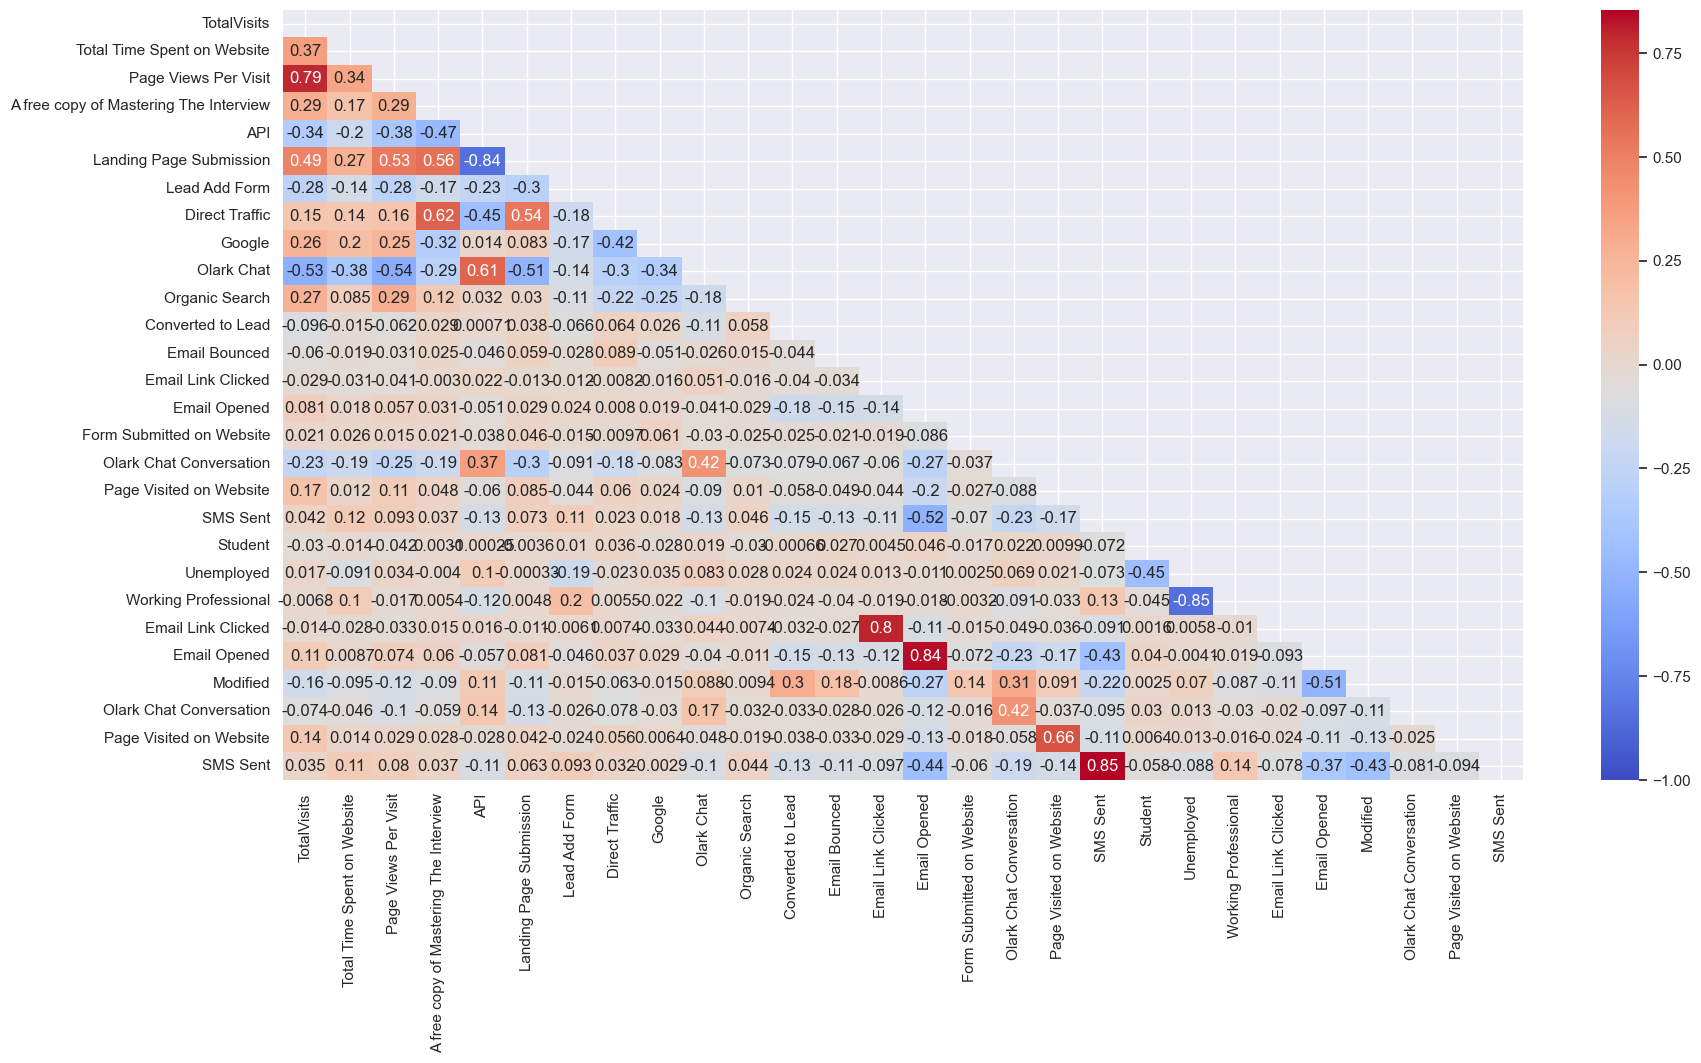

In [100]:
# Finding the Correlation using HeatMap
plt.figure(figsize = (20, 10))
mask = np.zeros(x_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(x_train.corr(), annot = True, vmin=-1,cmap='coolwarm',mask=mask)
plt.show()

* High Correlations are seen post converting all variables to continous variables

In [101]:
# Using rfe for features selection
logreg=LogisticRegression()

In [102]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [103]:
# Running RFE with the output number of the variable equal to 15
rfe=RFE(logreg,n_features_to_select=15)    # running RFE
rfe=rfe.fit(x_train,y_train)

In [104]:
## listing all the columns
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 12),
 ('API', True, 1),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Direct Traffic', False, 7),
 ('Google', False, 10),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 13),
 ('Converted to Lead', True, 1),
 ('Email Bounced', True, 1),
 ('Email Link Clicked', False, 11),
 ('Email Opened', False, 9),
 ('Form Submitted on Website', False, 14),
 ('Olark Chat Conversation', True, 1),
 ('Page Visited on Website', True, 1),
 ('SMS Sent', False, 8),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1),
 ('Email Link Clicked', False, 2),
 ('Email Opened', False, 5),
 ('Modified', False, 3),
 ('Olark Chat Conversation', False, 4),
 ('Page Visited on Website', False, 6),
 ('SMS Sent', True, 1)]

In [105]:
## Selected Features as per RFE
selected_cols = x_train.columns[rfe.support_]
selected_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'API', 'Landing Page Submission', 'Lead Add Form', 'Olark Chat',
       'Converted to Lead', 'Email Bounced', 'Olark Chat Conversation',
       'Page Visited on Website', 'Student', 'Unemployed',
       'Working Professional', 'SMS Sent'],
      dtype='object')

In [106]:
## Rejected Features as per RFE 
rejected_cols = x_train.columns[~(rfe.support_)]
rejected_cols

Index(['A free copy of Mastering The Interview', 'Direct Traffic', 'Google',
       'Organic Search', 'Email Link Clicked', 'Email Opened',
       'Form Submitted on Website', 'SMS Sent', 'Email Link Clicked',
       'Email Opened', 'Modified', 'Olark Chat Conversation',
       'Page Visited on Website'],
      dtype='object')

In [107]:
x_train_final = x_train[selected_cols]

##### Model Creation By Iteratively Dropping Features having Higher VIF and P-Value

##### Model 1

In [108]:

# Adding Constant
x_train_final = sm.add_constant(x_train_final)

# Create Object for the Model
lm = sm.GLM(y_train, x_train_final,family = sm.families.Binomial()).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6201
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.6
Date:                Mon, 27 Nov 2023   Deviance:                       5213.3
Time:                        23:31:18   Pearson chi2:                 7.76e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3894
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6914      0.701     -0.986      0.324      -2.065       0.683
TotalVisits                     1.3698      0.236      5.797      0.000       0.907       1.833
Total Time Spent on Website     4.5107      0.166     27.119      0.000       4.185       4.837
Page Views Per Visit           -1.2723      0.311     -4.086      0.000      -1.883      -0.662
API                            -0.3885      0.445     -0.873      0.383      -1.261       0.484
Landing Page Submission        -0.6643      0.443     -1.500      0.134      -1.532       0.204
Lead Add Form                   3.4235      0.469      7.293      0.000       2.503       4.344
Olark Chat                      1.1368      0.139      8.156      0.000       0.864       1.410
Converted to Lead              -1.0912      0.216     -5.060      0.000      -1.514      -0.669
Email Bounced                  -2.0820      0.310     -6.716      0.000      -2.690      -1.474
Olark Chat Conversation        -1.6024      0.185     -8.680      0.000      -1.964      -1.241
Olark Chat Conversation         0.1171      0.347      0.337      0.736      -0.564       0.798
Page Visited on Website        -0.9558      0.230     -4.150      0.000      -1.407      -0.504
Page Visited on Website         0.4861      0.308      1.581      0.114      -0.117       1.089
Student                        -0.9419      0.588     -1.601      0.109      -2.095       0.211
Unemployed                     -1.2006      0.547     -2.196      0.028      -2.272      -0.129
Working Professional            1.7633      0.580      3.039      0.002       0.626       2.901
SMS Sent                        0.0133      0.143      0.093      0.926      -0.266       0.293
SMS Sent                        1.4650      0.150      9.756      0.000       1.171       1.759
===============================================================================================
"""

In [109]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = x_train_final.columns
vif['VIF'] = [variance_inflation_factor(x_train_final.values,i) for i in range(x_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,444.22
5,Landing Page Submission,43.59
4,API,42.18
15,Unemployed,25.56
16,Working Professional,20.36
6,Lead Add Form,13.20
14,Student,7.17
17,SMS Sent,3.91
18,SMS Sent,3.74
3,Page Views Per Visit,3.18


In [110]:
## Dropping Feature Having Higher VIF
x_train_final = x_train_final.drop('Landing Page Submission',axis=1)
x_test = x_test.drop(['Landing Page Submission'],axis=1)
x_train_final.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'API', 'Lead Add Form', 'Olark Chat',
       'Converted to Lead', 'Email Bounced', 'Olark Chat Conversation',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Page Visited on Website', 'Student', 'Unemployed',
       'Working Professional', 'SMS Sent', 'SMS Sent'],
      dtype='object')

##### Model 2

In [111]:
# Adding Constant
x_train_final = sm.add_constant(x_train_final)

# Create Object for the Model
lm = sm.GLM(y_train, x_train_final,family = sm.families.Binomial()).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6202
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.7
Date:                Mon, 27 Nov 2023   Deviance:                       5215.4
Time:                        23:31:19   Pearson chi2:                 7.75e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3892
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.3311      0.559     -2.382      0.017      -2.426      -0.236
TotalVisits                     1.3554      0.236      5.745      0.000       0.893       1.818
Total Time Spent on Website     4.5009      0.166     27.104      0.000       4.175       4.826
Page Views Per Visit           -1.3002      0.311     -4.184      0.000      -1.909      -0.691
API                             0.2663      0.092      2.908      0.004       0.087       0.446
Lead Add Form                   4.0619      0.204     19.872      0.000       3.661       4.463
Olark Chat                      1.1221      0.139      8.078      0.000       0.850       1.394
Converted to Lead              -1.1033      0.215     -5.121      0.000      -1.526      -0.681
Email Bounced                  -2.0624      0.308     -6.704      0.000      -2.665      -1.459
Olark Chat Conversation        -1.6044      0.185     -8.695      0.000      -1.966      -1.243
Olark Chat Conversation         0.1194      0.347      0.344      0.731      -0.561       0.799
Page Visited on Website        -0.9599      0.230     -4.170      0.000      -1.411      -0.509
Page Visited on Website         0.4865      0.307      1.583      0.114      -0.116       1.089
Student                        -0.9448      0.588     -1.606      0.108      -2.098       0.208
Unemployed                     -1.1985      0.547     -2.192      0.028      -2.270      -0.127
Working Professional            1.7695      0.580      3.050      0.002       0.632       2.907
SMS Sent                        0.0202      0.143      0.141      0.888      -0.260       0.300
SMS Sent                        1.4520      0.150      9.683      0.000       1.158       1.746
===============================================================================================
"""

In [112]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = x_train_final.columns
vif['VIF'] = [variance_inflation_factor(x_train_final.values,i) for i in range(x_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,283.83
14,Unemployed,25.56
15,Working Professional,20.36
13,Student,7.17
16,SMS Sent,3.90
17,SMS Sent,3.73
3,Page Views Per Visit,3.17
1,TotalVisits,3.14
6,Olark Chat,2.51
11,Page Visited on Website,1.88


In [113]:
## Dropping Feature Having Higher VIF
x_train_final = x_train_final.drop('Unemployed',axis=1)
x_test = x_test.drop(['Unemployed'],axis=1)
x_train_final.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'API', 'Lead Add Form', 'Olark Chat',
       'Converted to Lead', 'Email Bounced', 'Olark Chat Conversation',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Page Visited on Website', 'Student', 'Working Professional',
       'SMS Sent', 'SMS Sent'],
      dtype='object')

##### Model 3

In [114]:
# Adding Constant
x_train_final = sm.add_constant(x_train_final)

# Create Object for the Model
lm = sm.GLM(y_train, x_train_final,family = sm.families.Binomial()).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6203
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.3
Date:                Mon, 27 Nov 2023   Deviance:                       5220.5
Time:                        23:31:19   Pearson chi2:                 7.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3887
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.5285      0.120    -21.003      0.000      -2.764      -2.293
TotalVisits                     1.3638      0.236      5.784      0.000       0.902       1.826
Total Time Spent on Website     4.5140      0.166     27.192      0.000       4.189       4.839
Page Views Per Visit           -1.3014      0.311     -4.191      0.000      -1.910      -0.693
API                             0.2683      0.092      2.931      0.003       0.089       0.448
Lead Add Form                   4.0760      0.204     19.959      0.000       3.676       4.476
Olark Chat                      1.1206      0.139      8.072      0.000       0.849       1.393
Converted to Lead              -1.1102      0.215     -5.153      0.000      -1.533      -0.688
Email Bounced                  -2.0714      0.308     -6.727      0.000      -2.675      -1.468
Olark Chat Conversation        -1.5971      0.184     -8.677      0.000      -1.958      -1.236
Olark Chat Conversation         0.1050      0.347      0.303      0.762      -0.575       0.785
Page Visited on Website        -0.9348      0.229     -4.088      0.000      -1.383      -0.487
Page Visited on Website         0.4519      0.306      1.476      0.140      -0.148       1.052
Student                         0.2465      0.225      1.097      0.272      -0.194       0.687
Working Professional            2.9628      0.201     14.751      0.000       2.569       3.356
SMS Sent                        0.0158      0.143      0.111      0.912      -0.264       0.295
SMS Sent                        1.4497      0.150      9.671      0.000       1.156       1.743
===============================================================================================
"""

In [115]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = x_train_final.columns
vif['VIF'] = [variance_inflation_factor(x_train_final.values,i) for i in range(x_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,11.08
15,SMS Sent,3.90
16,SMS Sent,3.73
3,Page Views Per Visit,3.17
1,TotalVisits,3.14
6,Olark Chat,2.51
11,Page Visited on Website,1.88
12,Page Visited on Website,1.83
4,API,1.74
9,Olark Chat Conversation,1.55


In [116]:
## Dropping Feature Having Higher VIF
x_train_final = x_train_final.drop('SMS Sent',axis=1)
x_test = x_test.drop(['SMS Sent'],axis=1)
x_train_final.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'API', 'Lead Add Form', 'Olark Chat',
       'Converted to Lead', 'Email Bounced', 'Olark Chat Conversation',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Page Visited on Website', 'Student', 'Working Professional'],
      dtype='object')

##### Model 4

In [117]:
# Adding Constant
x_train_final = sm.add_constant(x_train_final)

# Create Object for the Model
lm = sm.GLM(y_train, x_train_final,family = sm.families.Binomial()).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6205
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2778.9
Date:                Mon, 27 Nov 2023   Deviance:                       5557.7
Time:                        23:31:19   Pearson chi2:                 8.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3546
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.0376      0.109    -18.625      0.000      -2.252      -1.823
TotalVisits                     1.0558      0.227      4.643      0.000       0.610       1.502
Total Time Spent on Website     4.4761      0.161     27.852      0.000       4.161       4.791
Page Views Per Visit           -0.8387      0.297     -2.825      0.005      -1.421      -0.257
API                             0.2162      0.088      2.464      0.014       0.044       0.388
Lead Add Form                   4.0183      0.200     20.118      0.000       3.627       4.410
Olark Chat                      1.0968      0.134      8.214      0.000       0.835       1.359
Converted to Lead              -1.5841      0.213     -7.454      0.000      -2.001      -1.168
Email Bounced                  -2.5322      0.305     -8.289      0.000      -3.131      -1.933
Olark Chat Conversation        -2.0115      0.181    -11.107      0.000      -2.366      -1.657
Olark Chat Conversation         0.1370      0.345      0.397      0.691      -0.540       0.814
Page Visited on Website        -1.4005      0.225     -6.218      0.000      -1.842      -0.959
Page Visited on Website         0.5092      0.304      1.673      0.094      -0.087       1.106
Student                         0.0234      0.219      0.107      0.915      -0.406       0.453
Working Professional            2.9743      0.197     15.095      0.000       2.588       3.360
===============================================================================================
"""

In [118]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = x_train_final.columns
vif['VIF'] = [variance_inflation_factor(x_train_final.values,i) for i in range(x_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,10.21
3,Page Views Per Visit,3.15
1,TotalVisits,3.12
6,Olark Chat,2.50
11,Page Visited on Website,1.83
12,Page Visited on Website,1.83
4,API,1.74
5,Lead Add Form,1.50
9,Olark Chat Conversation,1.49
2,Total Time Spent on Website,1.27


In [119]:
## Dropping Feature Having Higher VIF
x_train_final = x_train_final.drop('Student',axis=1)
x_test = x_test.drop(['Student'],axis=1)
x_train_final.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'API', 'Lead Add Form', 'Olark Chat',
       'Converted to Lead', 'Email Bounced', 'Olark Chat Conversation',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Page Visited on Website', 'Working Professional'],
      dtype='object')

In [120]:
##### Model 5

In [121]:
# Adding Constant
x_train_final = sm.add_constant(x_train_final)

# Create Object for the Model
lm = sm.GLM(y_train, x_train_final,family = sm.families.Binomial()).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6206
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2778.9
Date:                Mon, 27 Nov 2023   Deviance:                       5557.7
Time:                        23:31:19   Pearson chi2:                 8.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3546
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.0369      0.109    -18.660      0.000      -2.251      -1.823
TotalVisits                     1.0559      0.227      4.643      0.000       0.610       1.502
Total Time Spent on Website     4.4762      0.161     27.853      0.000       4.161       4.791
Page Views Per Visit           -0.8396      0.297     -2.829      0.005      -1.421      -0.258
API                             0.2160      0.088      2.462      0.014       0.044       0.388
Lead Add Form                   4.0184      0.200     20.118      0.000       3.627       4.410
Olark Chat                      1.0970      0.134      8.215      0.000       0.835       1.359
Converted to Lead              -1.5840      0.213     -7.453      0.000      -2.001      -1.167
Email Bounced                  -2.5320      0.306     -8.288      0.000      -3.131      -1.933
Olark Chat Conversation        -2.0114      0.181    -11.107      0.000      -2.366      -1.656
Olark Chat Conversation         0.1379      0.345      0.400      0.689      -0.538       0.814
Page Visited on Website        -1.4001      0.225     -6.218      0.000      -1.841      -0.959
Page Visited on Website         0.5089      0.304      1.672      0.094      -0.088       1.105
Working Professional            2.9737      0.197     15.098      0.000       2.588       3.360
===============================================================================================
"""

In [122]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = x_train_final.columns
vif['VIF'] = [variance_inflation_factor(x_train_final.values,i) for i in range(x_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,10.15
3,Page Views Per Visit,3.15
1,TotalVisits,3.12
6,Olark Chat,2.50
11,Page Visited on Website,1.83
12,Page Visited on Website,1.83
4,API,1.74
5,Lead Add Form,1.50
9,Olark Chat Conversation,1.49
2,Total Time Spent on Website,1.27


In [123]:
## Dropping Feature Having Higher VIF
x_train_final = x_train_final.drop('Olark Chat Conversation',axis=1)
x_test = x_test.drop(['Olark Chat Conversation'],axis=1)
x_train_final.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'API', 'Lead Add Form', 'Olark Chat',
       'Converted to Lead', 'Email Bounced', 'Page Visited on Website',
       'Page Visited on Website', 'Working Professional'],
      dtype='object')

In [124]:
##### Model 6

In [125]:
# Adding Constant
x_train_final = sm.add_constant(x_train_final)

# Create Object for the Model
lm = sm.GLM(y_train, x_train_final,family = sm.families.Binomial()).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2884.2
Date:                Mon, 27 Nov 2023   Deviance:                       5768.4
Time:                        23:31:19   Pearson chi2:                 8.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3324
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.1026      0.109    -19.379      0.000      -2.315      -1.890
TotalVisits                     0.9835      0.224      4.383      0.000       0.544       1.423
Total Time Spent on Website     4.4694      0.159     28.133      0.000       4.158       4.781
Page Views Per Visit           -0.6609      0.294     -2.248      0.025      -1.237      -0.085
API                             0.0564      0.086      0.658      0.511      -0.112       0.225
Lead Add Form                   4.0501      0.199     20.382      0.000       3.661       4.440
Olark Chat                      0.7884      0.128      6.136      0.000       0.537       1.040
Converted to Lead              -1.4822      0.213     -6.956      0.000      -1.900      -1.065
Email Bounced                  -2.4223      0.309     -7.844      0.000      -3.028      -1.817
Page Visited on Website        -1.3024      0.225     -5.789      0.000      -1.743      -0.861
Page Visited on Website         0.5487      0.305      1.801      0.072      -0.048       1.146
Working Professional            3.0406      0.195     15.554      0.000       2.657       3.424
===============================================================================================
"""

In [126]:
## Dropping Feature Having Higher VIF
x_train_final = x_train_final.drop('API',axis=1)
x_test = x_test.drop(['API'],axis=1)
x_train_final.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Add Form', 'Olark Chat',
       'Converted to Lead', 'Email Bounced', 'Page Visited on Website',
       'Page Visited on Website', 'Working Professional'],
      dtype='object')

##### Model 7

In [127]:
# Adding Constant
x_train_final = sm.add_constant(x_train_final)

# Create Object for the Model
lm = sm.GLM(y_train, x_train_final,family = sm.families.Binomial()).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2884.4
Date:                Mon, 27 Nov 2023   Deviance:                       5768.9
Time:                        23:31:19   Pearson chi2:                 8.61e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3323
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.0779      0.102    -20.437      0.000      -2.277      -1.879
TotalVisits                     0.9825      0.224      4.378      0.000       0.543       1.422
Total Time Spent on Website     4.4717      0.159     28.154      0.000       4.160       4.783
Page Views Per Visit           -0.6897      0.291     -2.372      0.018      -1.260      -0.120
Lead Add Form                   4.0263      0.195     20.614      0.000       3.643       4.409
Olark Chat                      0.8206      0.119      6.899      0.000       0.587       1.054
Converted to Lead              -1.4818      0.213     -6.952      0.000      -1.900      -1.064
Email Bounced                  -2.4298      0.309     -7.875      0.000      -3.034      -1.825
Page Visited on Website        -1.3032      0.225     -5.791      0.000      -1.744      -0.862
Page Visited on Website         0.5478      0.305      1.797      0.072      -0.050       1.145
Working Professional            3.0369      0.195     15.543      0.000       2.654       3.420
===============================================================================================
"""

In [128]:
## Dropping Feature Having Higher VIF
x_train_final = x_train_final.drop('Page Visited on Website',axis=1)
x_test = x_test.drop(['Page Visited on Website'],axis=1)
x_train_final.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Add Form', 'Olark Chat',
       'Converted to Lead', 'Email Bounced', 'Working Professional'],
      dtype='object')

##### Model 8

In [129]:
# Adding Constant
x_train_final = sm.add_constant(x_train_final)

# Create Object for the Model
lm = sm.GLM(y_train, x_train_final,family = sm.families.Binomial()).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6211
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2910.4
Date:                Mon, 27 Nov 2023   Deviance:                       5820.9
Time:                        23:31:20   Pearson chi2:                 8.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3267
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.1103      0.101    -20.879      0.000      -2.308      -1.912
TotalVisits                     0.8018      0.219      3.667      0.000       0.373       1.230
Total Time Spent on Website     4.4755      0.158     28.389      0.000       4.166       4.784
Page Views Per Visit           -0.5940      0.286     -2.080      0.037      -1.154      -0.034
Lead Add Form                   4.0385      0.195     20.717      0.000       3.656       4.421
Olark Chat                      0.8414      0.118      7.107      0.000       0.609       1.073
Converted to Lead              -1.4320      0.213     -6.723      0.000      -1.849      -1.014
Email Bounced                  -2.3764      0.308     -7.708      0.000      -2.981      -1.772
Working Professional            3.0413      0.194     15.636      0.000       2.660       3.422
===============================================================================================
"""

In [130]:
# Calculation of VIF
vif = pd.DataFrame()
vif['Features'] = x_train_final.columns
vif['VIF'] = [variance_inflation_factor(x_train_final.values,i) for i in range(x_train_final.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,8.79
1,TotalVisits,3.02
3,Page Views Per Visit,3.02
5,Olark Chat,2.01
4,Lead Add Form,1.42
2,Total Time Spent on Website,1.26
6,Converted to Lead,1.10
8,Working Professional,1.06
7,Email Bounced,1.02


In [131]:
# Prediciting values on ytrain
y_train_pred = lm.predict(x_train_final).values.reshape(-1)

In [132]:
y_train.head()

Lead Number
638023    0
640674    1
618132    1
599422    0
584237    0
Name: Converted, dtype: int64

In [133]:
y_train_pred_final = pd.DataFrame({'Converted':y_train, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.684333,638023
1,1,0.219453,640674
2,1,0.221781,618132
3,0,0.256594,599422
4,0,0.219453,584237


In [134]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [135]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.684333,638023,1
1,1,0.219453,640674,0
2,1,0.221781,618132,0
3,0,0.256594,599422,0
4,0,0.219453,584237,0


In [136]:
# Finding the metrics like accuracy, sensitivity and specificity
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [137]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, Specificity {}'.format(acc,sensi,speci))

Accuracy: 0.792604501607717, Sensitivity 0.6431865828092244, Specificity 0.8855280312907432


##### Confusion Matrix Creation

In [138]:
# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3396,  439],
       [ 851, 1534]], dtype=int64)

In [139]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [140]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.11447196870925684


In [141]:
# positive predictive value 
print (TP / float(TP+FP))

0.7774961986822099


In [142]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7996232634801036


In [143]:
## ROC CURVE DRAW FUNCTION
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

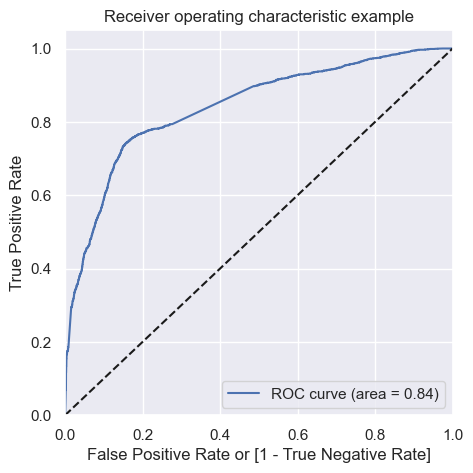

In [145]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding the optimal Point

In [146]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.684333,638023,1,1,1,1,1,1,1,1,0,0,0
1,1,0.219453,640674,0,1,1,1,0,0,0,0,0,0,0
2,1,0.221781,618132,0,1,1,1,0,0,0,0,0,0,0
3,0,0.256594,599422,0,1,1,1,0,0,0,0,0,0,0
4,0,0.219453,584237,0,1,1,1,0,0,0,0,0,0,0


In [147]:
# Calculatoing Accuracy,Sensitivity and Specificity for all probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.383441     1.000000     0.000000
0.1   0.1  0.446463     0.992872     0.106649
0.2   0.2  0.634244     0.909853     0.462842
0.3   0.3  0.799357     0.757233     0.825554
0.4   0.4  0.801608     0.708595     0.859452
0.5   0.5  0.792605     0.643187     0.885528
0.6   0.6  0.773151     0.546751     0.913950
0.7   0.7  0.756109     0.450734     0.946023
0.8   0.8  0.731350     0.344654     0.971838
0.9   0.9  0.679743     0.174004     0.994263


<Figure size 2000x1500 with 0 Axes>

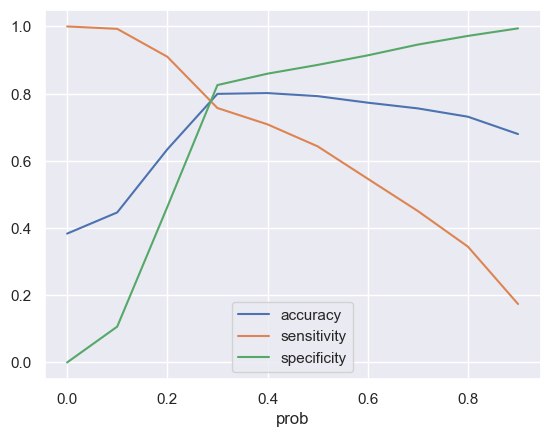

In [148]:
# Accuracy Sensitivity and Specificity for all probabilities plot
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

* Cut off at 0.29

In [149]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.29 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.684333,638023,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.219453,640674,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.221781,618132,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.256594,599422,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.219453,584237,0,1,1,1,0,0,0,0,0,0,0,0


##### Metrics Accuracy, Sensitivity, Specificity

In [150]:

acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7969453376205787, Sensitivity 0.7584905660377359, specifitiy 0.8208604954367666  


In [151]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3396,  439],
       [ 851, 1534]], dtype=int64)

In [152]:
# Finding the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7247596153846154

In [153]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7584905660377359

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

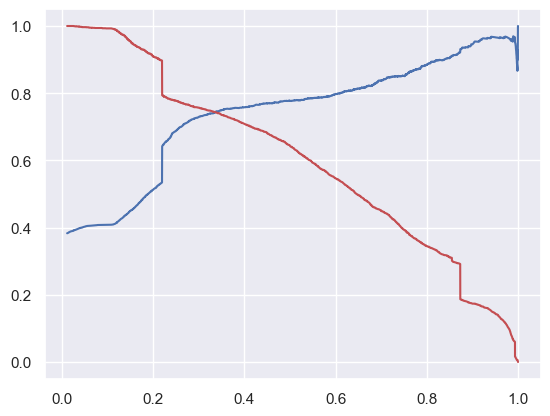

In [155]:
plt.plot(thresholds, p[:-1], "b-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.show()

###### Making Prediction on Test Set

In [156]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6220, 28), (2667, 18), (6220,), (2667,))

In [157]:
## adding constant
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Converted to Lead,Email Bounced,Email Link Clicked,Email Opened,Form Submitted on Website,Working Professional,Email Link Clicked,Email Opened,Modified
Lead Number,,,,,,,,,,,,,,,,,,,
607149,1.0,0.5,0.190857,0.167,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
607690,1.0,0.4,0.036840,0.400,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
641673,1.0,0.5,0.016423,0.250,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
598522,1.0,0.5,0.148691,0.125,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
628726,1.0,0.0,0.000000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [158]:
cols = list(x_train_final.columns)

In [159]:
x_test_sm = x_test_sm[cols]

In [160]:
y_test_pred = lm.predict(x_test_sm)
y_test_pred.sample(5)

Lead Number
586680    0.120548
601071    0.205601
659079    0.127451
643065    0.231331
619196    0.992495
dtype: float64

In [161]:
# Converting y_test_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [164]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,607149,0.278006
1,1,607690,0.764774
2,0,641673,0.143767
3,0,598522,0.246357
4,1,628726,0.219453


In [165]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.305 else 0)

In [166]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [167]:
print('Accuracy: {}, Sensitivity {}, Specificity {}  '.format(acc,sensi,speci))

Accuracy: 0.7960254968128984, Sensitivity 0.76162215628091, Specificity 0.8170289855072463  


* Accuracy: The proportion of correct predictions made by the model.
* Sensitivity: The proportion of actual positive cases that the model correctly identified as positive.
* Specificity: The proportion of actual negative cases that the model correctly identified as negative.
* Model is doing well in test scenarios, as we have achieved Accuracy of 80%, Sensitivity of 76% and Specificity of 82%

##### Lead Score Assignment

In [168]:
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [169]:
lead_scorer_df=pd.concat([df1,df2],ignore_index=True)

In [170]:
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [171]:
lead_scorer_df.sample(10)

,Lead Number,Converted_Prob,Lead Score
3277,607814,0.254509,25.45
7009,623206,0.201082,20.11
5998,634636,0.219453,21.95
1168,644702,0.967610,96.76
2867,637203,0.219453,21.95
7949,658278,0.159565,15.96
4452,629776,0.142272,14.23
5175,588104,0.993102,99.31
7779,646448,0.168919,16.89
3110,586293,0.956130,95.61
